In [1]:
import time

import cv2
import numpy as np
from PIL import Image

from yolo import YOLO, YOLO_ONNX

import os
from tqdm import tqdm
import matplotlib.pyplot as plt


In [2]:
yolo = YOLO()

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
logs/best_epoch_weights.pth model, and classes loaded.
Configurations:
----------------------------------------------------------------------
|                     keys |                                   values|
----------------------------------------------------------------------
|               model_path |              logs/best_epoch_weights.pth|
|             classes_path |                      model_data/ML_3.txt|
|             anchors_path |              model_data/yolo_anchors.txt|
|             anchors_mask |        [[6, 7, 8], [3, 4, 5], [0, 1, 2]]|
|              input_shape |                               [640, 640]|
|                      phi |                                        l|
|               confidence |                                      0.7|
|                  nms_iou |                                      0.7|
|          letterbox_image |                        

In [3]:
import easyocr
reader = easyocr.Reader(['en'])

# 建立字典

In [4]:
char_set={}
ascii=65
digits=10
for i in range(26):
    if str(digits)[-1]==str(digits)[-2]:
        digits+=1
    char_set.update({chr(ascii):digits})
    ascii+=1
    digits+=1

In [31]:
def image_to_text(text):       
    #將辨識出的字組合在一起
    predict=''
    for i in text:
        predict+=i
    predict  

    # 過濾字串
    text=str.upper(predict)
    cleaned_text = remove_special_characters(text) 
    cleaned_text=cleaned_text[:10]
    # print(cleaned_text)

    #將字串轉成對應的數字，來預測第11個字
    container_text=[]
    for i in cleaned_text:
        if(str.isupper(i)):
            container_text.append(char_set[i])
        else:
            container_text.append(int(i))     

    #透過公式轉成對應的第11個數字
    sum=0
    for i in range(len(container_text)):
        sum+=container_text[i]*(2**i)
    number11=sum%11    
    if sum%11==10:
        number11=0
    cleaned_text+=str(number11)
    return cleaned_text      

# # 对图像进行对比度增强
# from PIL import ImageEnhance
# def enhance_contrast(image, alpha, beta):   
#     enhanced_image = np.clip(alpha * np.array(image) + beta, 0, 255).astype(np.uint8)
#     return enhanced_image

# # 设置对比度增强的参数
# alpha = 1.3 # 对比度增强因子1.3 
# beta = 15 # 亮度增强因子15

#使用正则表达式匹配除了数字和英文字母之外的字符，并替换为空字符串
import re
def remove_special_characters(text):
    cleaned_text = re.sub('[^A-Z0-9]', '', text)
    return cleaned_text

In [6]:
dir_origin_path='VOCdevkit/container/JPEGImages/測試集'

In [7]:
from PIL import ImageEnhance

def image_enhance(image):
    # 打开图像
    # image = Image.open(image_path)
    # 创建图像增强对象
    enhancer = ImageEnhance.Brightness(image)
    # 增强亮度
    brightened_image = enhancer.enhance(0.5)  # 参数为增强倍数

    contrast = ImageEnhance.Contrast(brightened_image)# 調整對比  
    output_c5 = contrast.enhance(5)# 提高對比 

    color = ImageEnhance.Color(output_c5)# 調整飽和度
    output_color5 = color.enhance(0)# 提高飽和度

    # sharpness = ImageEnhance.Sharpness(output_color5)# 調整銳利度
    # output_s15 = sharpness.enhance(15)# 提高銳利度
    return output_color5



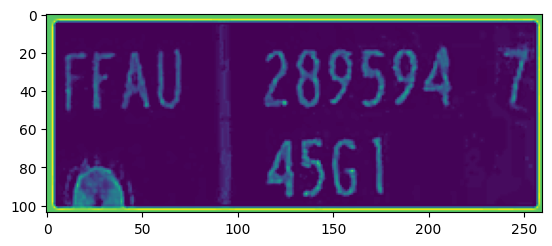

IFFAU289597


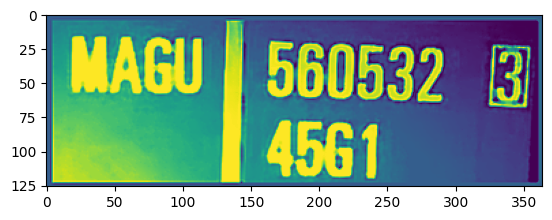

MAGU5605323


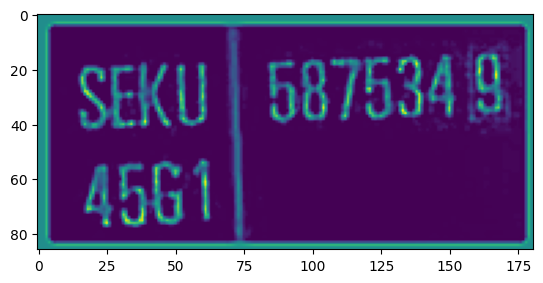

SEKU5875349


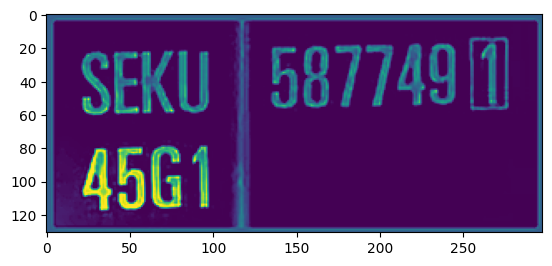

SEKU5877491


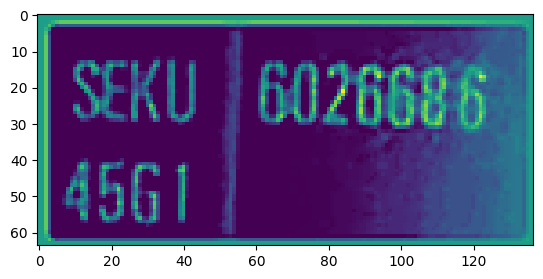

SEKU6026686


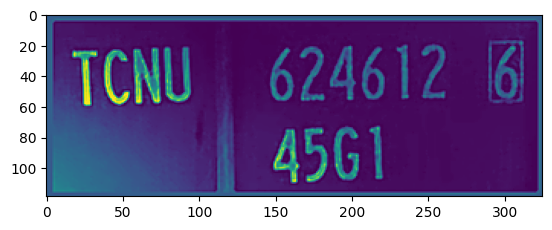

TCNU6246126


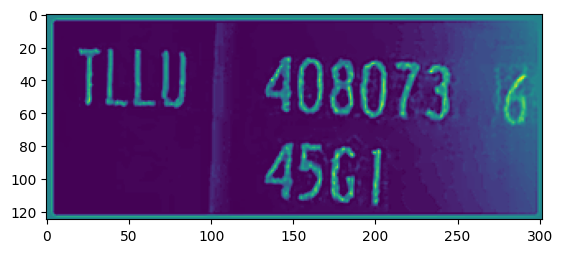

TLLU4080736


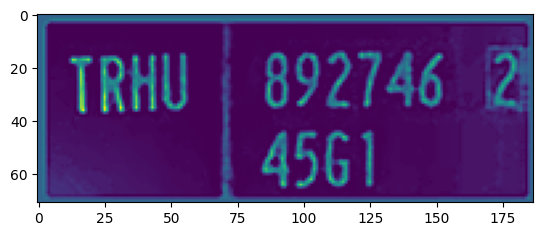

TRHU8927462


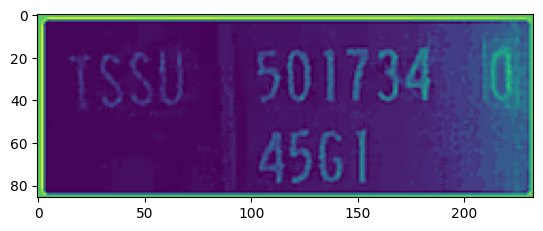

TSSU5017340


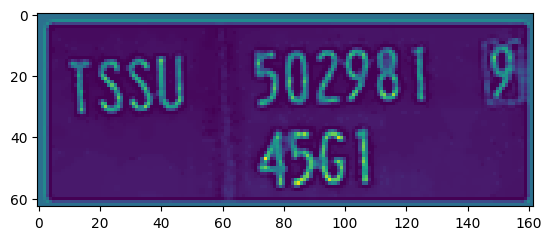

TSSU5029819


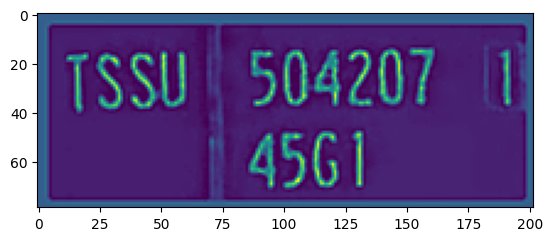

TSSU5042071


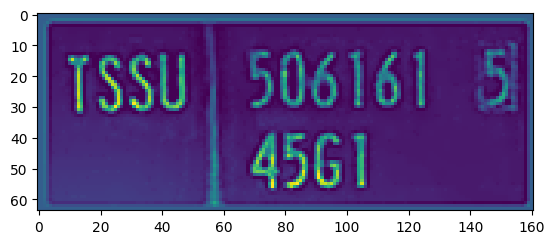

TSSU5061615


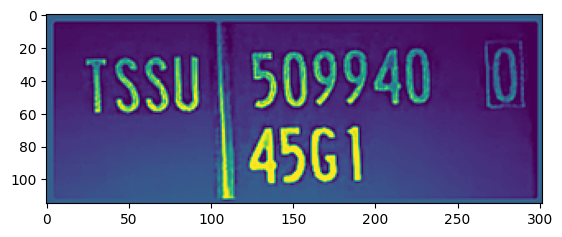

TSSU5099400


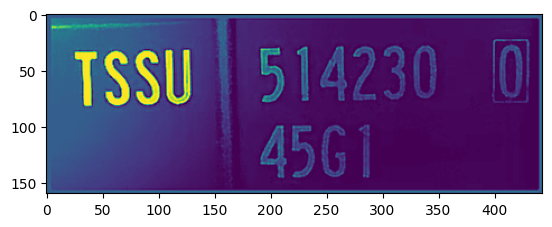

TSSU5142300


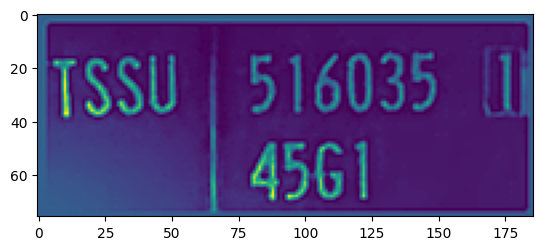

TSSU5160351


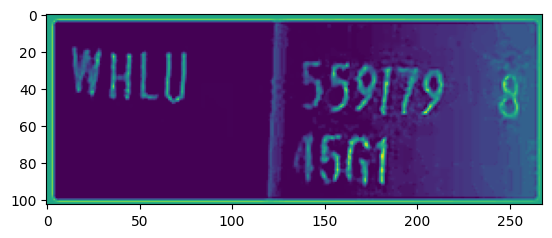

WHLU5591798


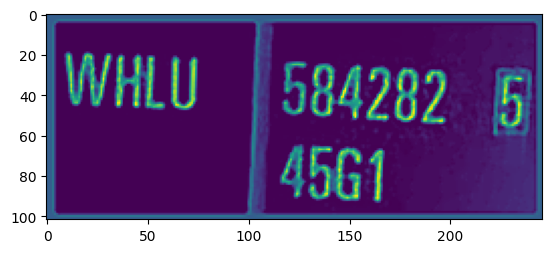

WHLU5842825


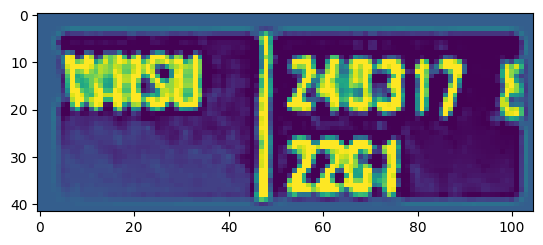

MISU2403174


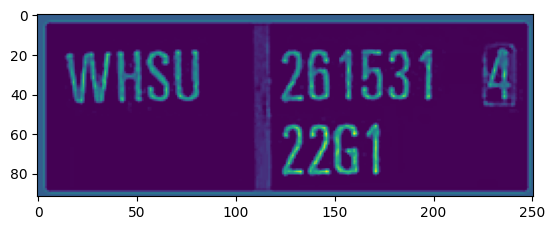

WHSU2615314


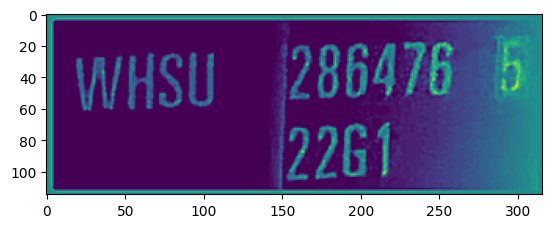

WHSU2864765


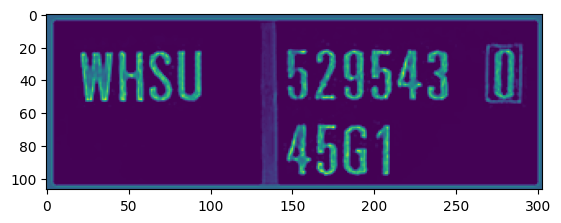

WHSU5295430


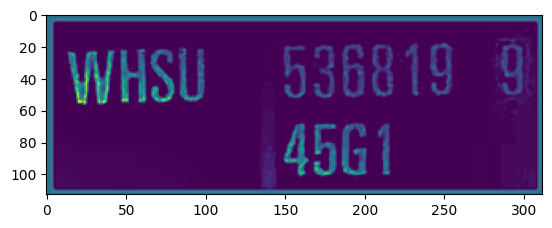

WHSU5368199


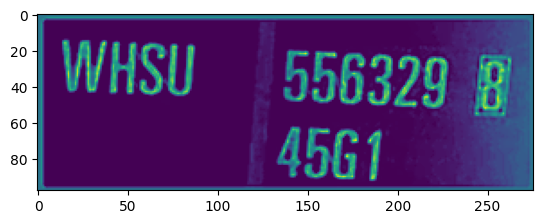

WHSU5563298


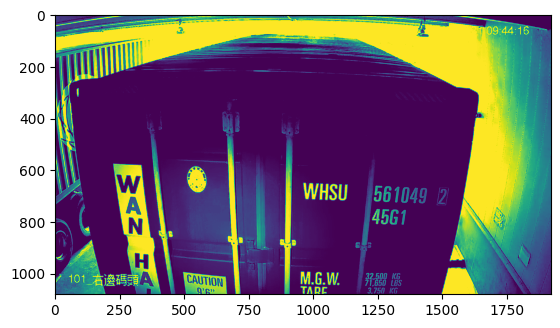

7094416WHS0


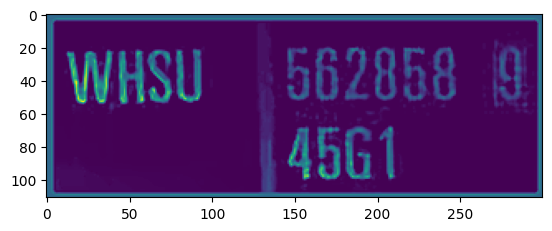

WHSU5628589


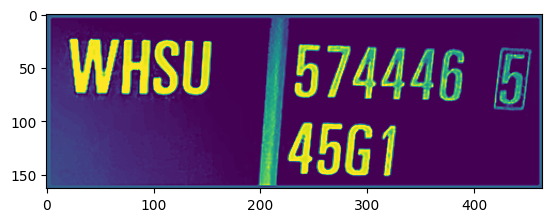

WHSU5744465


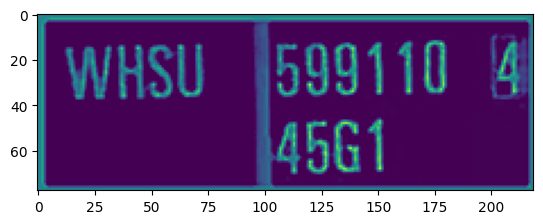

WHSU5991104


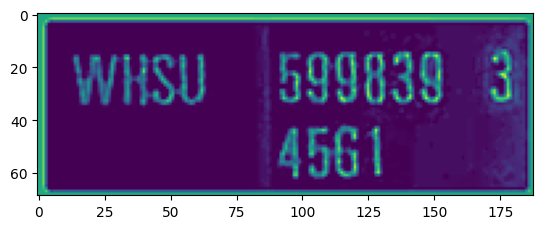

WVHSU599036


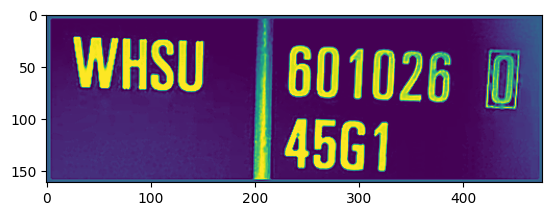

WHSU6010260


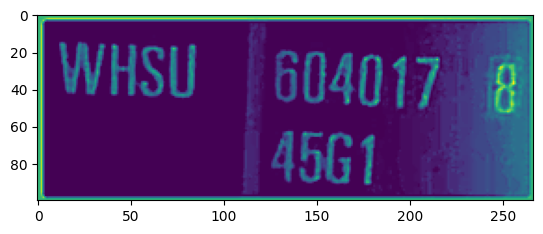

WHSU6040178


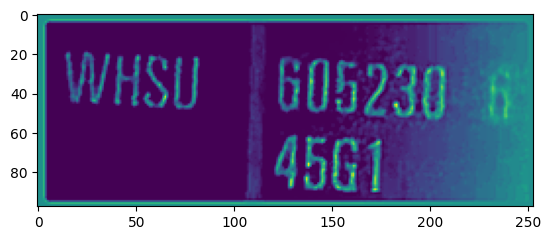

WHSU6052306


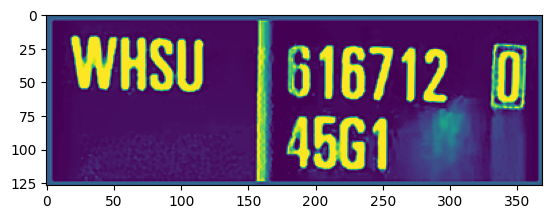

WHSU6167120


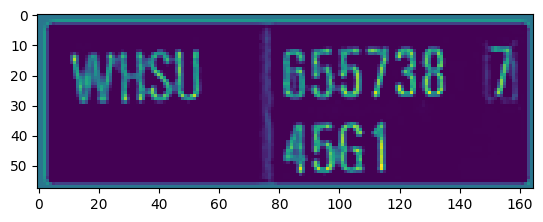

WHSU6557387


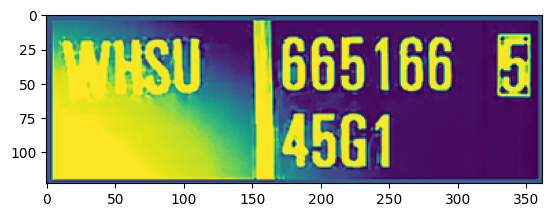

WHSU6651665


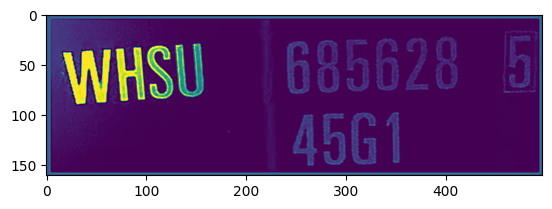

WHSU6856285


In [45]:
img_names = os.listdir(dir_origin_path)

for img_name in img_names:
    
    if img_name.lower().endswith(('.bmp', '.dib', '.png', '.jpg', '.jpeg', '.pbm', '.pgm', '.ppm', '.tif', '.tiff')):
        image_path  = os.path.join(dir_origin_path, img_name)
        image       = Image.open(image_path)
        r_image ,crop ,_  = yolo.detect_image(image)
        crop_picture=r_image.crop(crop)

        # 对图像进行对比度增强
        crop_picture = image_enhance(crop_picture)
        # crop_picture=enhance_contrast(crop_picture,alpha,beta)   
        crop_picture = crop_picture.convert('L')
        

        #閉運算
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
        dilationimage2 = cv2.morphologyEx(np.array(crop_picture), cv2.MORPH_CLOSE, kernel)

        # 執行平均濾波
        kernel_size = (2, 2)  # 濾波器的大小
        smoothed_image = cv2.blur(dilationimage2, kernel_size)

        # 將 NumPy 陣列轉換為 PIL 形式的圖像
        pil_image = Image.fromarray(smoothed_image)

        sharpness = ImageEnhance.Sharpness(pil_image)# 調整銳利度
        crop_picture = sharpness.enhance(4)# 提高銳利度


        text=reader.readtext(np.array(crop_picture), detail = 0)
        plt.imshow(crop_picture)  
        plt.show()
        #將辨識出的字組合在一起
        predict=''
        for i in text:
            predict+=i

        # 過濾字串
        text=str.upper(predict)
        cleaned_text = remove_special_characters(text)

        if (cleaned_text[4]=='1'):
            cleaned_text=cleaned_text[:4]+cleaned_text[5:]

        cleaned_text=cleaned_text[:10]
        
        #將字串轉成對應的數字，來預測第11個字
        container_text=[]
        for i in cleaned_text:
            if(str.isupper(i)):
                container_text.append(char_set[i])
            else:
                container_text.append(int(i))   
        container_text   

        #透過公式轉成對應的第11個數字
        sum=0
        for i in range(len(container_text)):
            sum+=container_text[i]*(2**i)  
        number11=sum%11    
        if sum%11==10:
            number11=0
        cleaned_text+=str(number11)
        print(cleaned_text)
        # if not os.path.exists(dir_save_path):
        #     os.makedirs(dir_save_path)
        # r_image.save(os.path.join(dir_save_path, img_name.replace(".jpg", ".png")), quality=95, subsampling=0)


In [ ]:
# img_name=img_names[3]
# image_path  = os.path.join(dir_origin_path, img_name)
# image       = Image.open(image_path)
# r_image ,crop   = yolo.detect_image(image)
# crop_picture=r_image.crop(crop)
# crop_picture = crop_picture.convert('L')
# import matplotlib.pyplot as plt
# import pytesseract
# plt.imshow(crop_picture)   
# # img = Image.open('img_out/image_0001.png')
# text = pytesseract.image_to_string(crop_picture, lang='eng')
# print(text)